In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import random 
import pandas as pd

output = 'figures/'

In [2]:
def sst(T, h):
    return (R*T + gama*h-epsilon*(h+b*T)**3 + gama* xi)
def thermo(T,h):
    return (-r*h -alpha*b*T-alpha*xi)
def rungeKutta(T,h):
    "Apply Runge Kutta Formulas to find next value of T and h"
    k1 =  sst(T, h)
    kk1 =  thermo(T, h)
    
    k2 =  sst(T + dt*0.5 * k1, h + dt*0.5 * kk1 )
    kk2 = thermo(T + dt*0.5 * k1, h + dt*0.5 * kk1 )
    
    k3 =  sst(T + dt*0.5 * k2, h + dt*0.5 *kk2  )
    kk3 = thermo(T + dt*0.5 * k2, h + dt*0.5 * kk2 )
    
    k4 = sst(T + dt*k3, h + dt*kk3 )
    kk4 = thermo(T + dt*k3, h + dt*kk3 )
    T = T + (1.0 / 6.0)*dt*(k1 + 2 * k2 + 2 * k3 + k4)
    h = h + (1.0 / 6.0)*dt*(kk1 + 2 * kk2 + 2 * kk3 + kk4)
    return T,h

# Task A: μ = 2/3
For a nonlinear system, this is the critical value for the coupling coefficient.

In [3]:
# initial
T0 = 1.125/7.5
h0 = 0
T = T0
h = h0

### time space
time = 120*30/60  #total time 120 months non-dimensionalise by 2 months
dt = 1/60 # time step 1 day and also non-dimensionalise by 2 months(60 days)
n = int(time/dt)# total number of time steps 3600 steps or days/ 120 months/ 20 years

###parameters
b0 = 2.5 # a high-end value of the coupling parameter.
gama = 0.75 #specifies the feedback of the thermocline gradient on the SST gradient.
c = 1  #damping rate of SST anomalies.
r = 0.25  #represents damping of the upper ocean heat content.
alpha = 0.125 # relates enhanced easterly wind stress to the recharge of ocean heat content.
epsilon = 0   # no nonlinearity
xi = 0  # no forcing 
mu = 2/3
b = b0*mu
R = gama*b - c

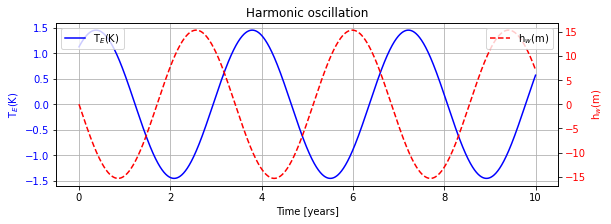

In [4]:
T_arr, h_arr = [], []

for i in range(0, n):
    T_arr.append(T)
    h_arr.append(h)
    T, h = rungeKutta(T, h)
    
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(9,3))

ax = fig.add_subplot(111)
color = 'b'
ax.plot(xlim*2/12, np.array(T_arr)*7.5, color=color,label="T$_E$(K)")
ax.set_xlabel('Time [years]')
ax.set_ylabel("T$_E$(K)",color=color)
ax.legend(loc='upper left')
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'r'
ax2.plot(xlim*2/12, np.array(h_arr)*150,'--',color=color,label="h$_w$(m)")
ax2.set_ylabel("h$_w$(m)",color=color)
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor=color)
ax.grid()

plt.title("Harmonic oscillation")
plt.savefig(output+'taskA')

# Task B mu >2/3 and mu < 2/3
For a linear system, these are respectively the supercritical and subcritical values for the coupling coefficient.

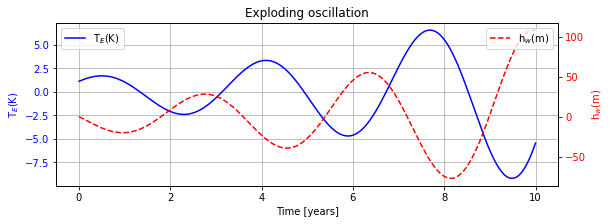

In [5]:
mu = 0.7
b = b0*mu
R = gama*b - c
T_arr, h_arr = [], []
T = T0
h = h0

for i in range(0, n):
    T_arr.append(T)
    h_arr.append(h)
    T, h = rungeKutta(T, h)
    
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(9,3))

ax = fig.add_subplot(111)
color = 'b'
ax.plot(xlim*2/12, np.array(T_arr)*7.5, color=color,label="T$_E$(K)")
ax.set_xlabel('Time [years]')
ax.set_ylabel("T$_E$(K)",color=color)
ax.legend(loc='upper left')
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'r'
ax2.plot(xlim*2/12, np.array(h_arr)*150,'--',color=color,label="h$_w$(m)")
ax2.set_ylabel("h$_w$(m)",color=color)
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor=color)
ax.grid()

plt.title("Exploding oscillation")
plt.savefig(output+'taskB_exploding')

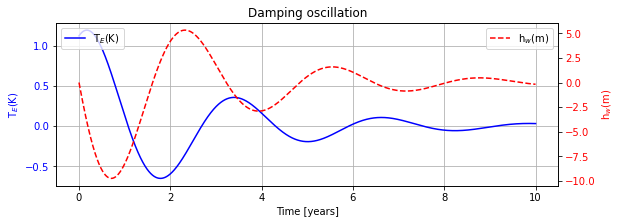

In [6]:
mu = 0.6
b = b0*mu
R = gama*b - c
T_arr, h_arr =[],[]
T = T0
h = h0

for i in range(0, n):
    T_arr.append(T)
    h_arr.append(h)
    T, h = rungeKutta(T, h)
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
color = 'b'
ax.plot(xlim*2/12, np.array(T_arr)*7.5, color=color,label="T$_E$(K)")
ax.set_xlabel('Time [years]')
ax.set_ylabel("T$_E$(K)",color=color)
ax.legend(loc='upper left')
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'r'
ax2.plot(xlim*2/12, np.array(h_arr)*150,'--',color=color,label="h$_w$(m)")
ax2.set_ylabel("h$_w$(m)",color=color)
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor=color)
ax.grid()
plt.title("Damping oscillation")

plt.savefig(output+'taskB_damping')

# Task C: Turn on nonlinearity
With nonlinearity, the critical value for the coupling coefficient is different. Here, for $\mu$ = 0.7 and $\epsilon$ = 0.1, the system attains a stable oscillation.

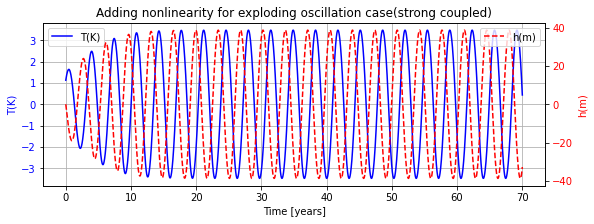

In [7]:
epsilon = 0.1
mu = 0.7
b = b0*mu
R = gama*b - c

time = 120*7*30/60  #total time 120 months non-dimensionalise by 2 months
dt = 1/60 # time step 1 day and also non-dimensionalise by 2 months(60 days)
n = int(time/dt)# total number of time steps 3600 steps or days/ 120 months/ 20 years

T_arr, h_arr =[], []
T= T0
h = h0
for i in range(0, n ):
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
color = 'b'
ax.plot(xlim*2/12, np.array(T_arr)*7.5, color=color,label="T(K)")
ax.set_xlabel('Time [years]')
ax.set_ylabel("T(K)",color=color)
ax.legend(loc='upper left')
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'r'
ax2.plot(xlim*2/12, np.array(h_arr)*150,'--',color=color,label="h(m)")
ax2.set_ylabel("h(m)",color=color)
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor=color)
ax.grid()
plt.title("Adding nonlinearity for exploding oscillation case(strong coupled)")

plt.savefig(output+'taskC_nonlinearity')

# Task D: Annual Wind Forcing
An annual wind forcing is added. Initially it is set as $f_{annual}$ = 0.1

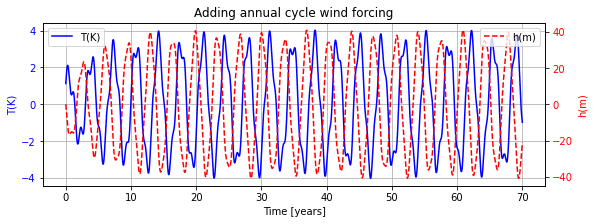

In [8]:
T = T0
h = h0
mu = 0.7
b = b0*mu
R = gama*b - c
epsilon = 0.1

time = 120*7*30/60  #total time 120 months non-dimensionalise by 2 months
dt = 1/60 # time step 1 day and also non-dimensionalise by 2 months(60 days)
n = int(time/dt)# total number of time steps 3600 steps or days/ 120 months/ 20 years

f_ann = 0.1
tao = 12*30/60 # 12 months.  must divide this by 2 months to non-dimensional
T_arr, h_arr =[], []  
for i in range(0, n):
    xi = f_ann * np.cos(2*np.pi * (i+1) /60/tao)
    T_arr.append(T)
    h_arr.append(h)
    T, h = rungeKutta(T, h)
    
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
color = 'b'
ax.plot(xlim*2/12, np.array(T_arr)*7.5, color=color,label="T(K)")
ax.set_xlabel('Time [years]')
ax.set_ylabel("T(K)",color=color)
ax.legend(loc='upper left')
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'r'
ax2.plot(xlim*2/12, np.array(h_arr)*150,'--',color=color,label="h(m)")
ax2.set_ylabel("h(m)",color=color)
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor=color)
ax.grid()
plt.title("Adding annual cycle wind forcing")

plt.savefig(output+'taskD_annualWindForcing')

# Task E: Random Forcing

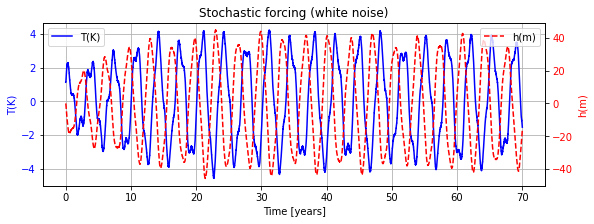

In [9]:
import random
T = T0
h = h0
mu = 0.7
b = b0*mu
R = gama * b - c
epsilon = 0.1
f_ann = 0.1
f_ran = 0.2
tao = 12*30/60 # 12 months.  must divide this by 2 months to non-dimensional
T_arr, h_arr = [],[]
for i in range(0, n):
    w = (2*random.random()-1)
    xi = f_ann * np.cos(2*np.pi * (i+1) /60/tao) + f_ran*w
    #print(xi)
    T_arr.append(T)
    h_arr.append(h)
    T, h = rungeKutta(T, h)
    
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
color = 'b'

ax.plot(xlim*2/12, np.array(T_arr)*7.5, color=color,label="T(K)")
ax.set_xlabel('Time [years]')
ax.set_ylabel("T(K)",color=color)
ax.legend(loc='upper left')
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'r'
ax2.plot(xlim*2/12, np.array(h_arr)*150,'--',color=color,label="h(m)")
ax2.set_ylabel("h(m)",color=color)
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor=color)
ax.grid()

plt.title("Stochastic forcing (white noise)")
plt.savefig(output+'taskE_whiteNoise')

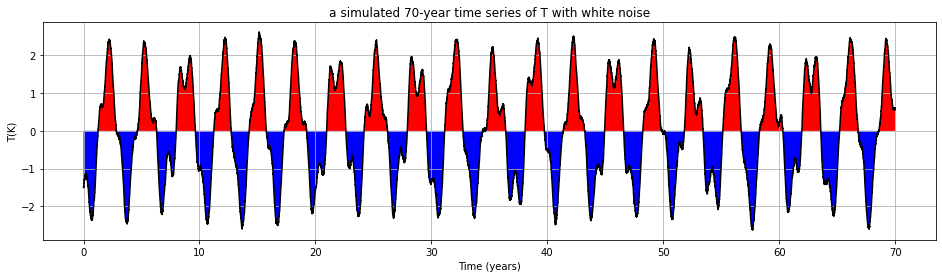

In [10]:
fig = plt.figure(figsize=(16,4))
time = 120*7*30/60
n = int(time/dt)
xlim = np.linspace(0,time,n)
T = -1.5/7.5
h = h0
mu = 0.75
b = b0*mu
R = gama*b - c
epsilon = 0.6
f_ann = 0.1
f_ran = 0.2
tao = 12*30/60 # 12 months.  must divide this by 2 months to non-dimensional
T_arr, h_arr =[], []

for i in range(0, n ):
    w = (2*random.random()-1)
    xi = f_ann * np.cos(2*np.pi * (i+1) /60/tao) + f_ran*w  # white noise
    #print(xi)
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
    
plt.plot(xlim*2/12, np.array(T_arr)*7.5, label="T(K)",color='k')
x = xlim*2/12
y2 = np.array(T_arr)*7.5
y1 = 0*y2

plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='red', interpolate=True)
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='blue', interpolate=True)
#plt.plot(xlim*2/12, np.array(h_arr)*15,'--',color="red",label="h$_w$(10m)")

plt.grid()
plt.xlabel("Time (years)")
plt.ylabel("T(K)")
plt.title("a simulated 70-year time series of T with white noise")
plt.savefig(output+'whiteNoiseSeventyYears')

# implement red noise

In [11]:
mu = 0.7
b = b0*mu
R = gama * b - c
epsilon = 0.1
f_ann = 0.1
f_ran = 0.2

# time parameters
time = 120*7*30/60  #total time 120 months non-dimensionalise by 2 months
dt = 1/60 # time step 1 day and also non-dimensionalise by 2 months(60 days)
n = int(time/dt)

T = T0
h = h0
tau = 12*30/60 # 12 months.  must divide this by 2 months to non-dimensional
T_arr, h_arr =[],[]

#white noise
r = 0.34#correlation coefficient
s = np.sqrt(1 - r**2)
w = np.zeros(n)
w[0] = (2*random.random()-1)

for i in range(1,n):
    w[i] = (r*w[i-1]+ (2*random.random()-1))#  x(j+1) = r*x(j) + s*w(j+1);
    xi = f_ann * np.cos(2*np.pi * (i+1) /60/tau) + f_ran*w[i] #f_ann*np.cos(2*np.pi*(i+1)/tau/60) 
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)

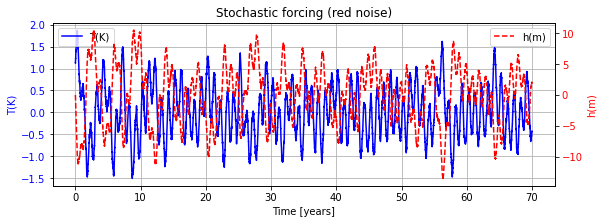

In [12]:
xlim = np.linspace(0,time,n-1)
fig = plt.figure(figsize=(9,3))

ax = fig.add_subplot(111)
color = 'b'
ax.plot(xlim*2/12, np.array(T_arr)*7.5, color=color,label="T(K)")
ax.set_xlabel('Time [years]')
ax.set_ylabel("T(K)",color=color)
ax.legend(loc='upper left')
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'r'
ax2.plot(xlim*2/12, np.array(h_arr)*150,'--',color=color,label="h(m)")
ax2.set_ylabel("h(m)",color=color)
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor=color)
ax.grid()

plt.title("Stochastic forcing (red noise)")
plt.savefig(output+'taskE_redNoise')

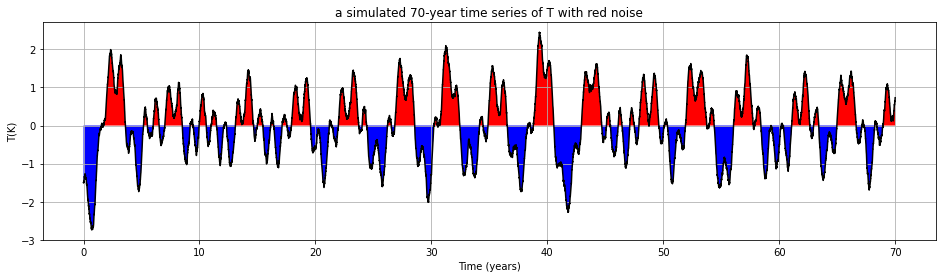

In [13]:
fig = plt.figure(figsize=(16,4))
time = 120*7*30/60
n = int(time/dt)
xlim = np.linspace(0,time,n-1)

T = -1.5/7.5
h = h0
mu = 0.7
b = b0*mu
R = gama * b - c
epsilon = 0.1
f_ann = 0.1
f_ran = 0.2
tau = 12*30/60 # 12 months.  must divide this by 2 months to non-dimensional
T_arr, h_arr = [],[]
r=0.33#correlation coefficient
s = np.sqrt(1 - r**2)
w = np.zeros(n)
w[0] = (2*random.random()-1)

for i in range(1,n):
    w[i] = (r*w[i-1]+ s*(2*random.random()-1))
    xi = f_ann*np.cos(2*np.pi*(i+1)/tau/60) + f_ran*w[i]  # red noise
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
      
plt.plot(xlim*2/12, np.array(T_arr)*7.5, label="T(K)",color='k')
x = xlim*2/12
y2 = np.array(T_arr)*7.5
y1 = 0*y2

plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='red', interpolate=True)
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='blue', interpolate=True)
#plt.plot(xlim*2/12, np.array(h_arr)*15,'--',color="red",label="h$_w$(10m)")

plt.grid()
plt.xlabel("Time (years)")
plt.ylabel("T(K)")
plt.title("a simulated 70-year time series of T with red noise")
plt.savefig(output+'redNoiseSeventyYears')

# ensemble

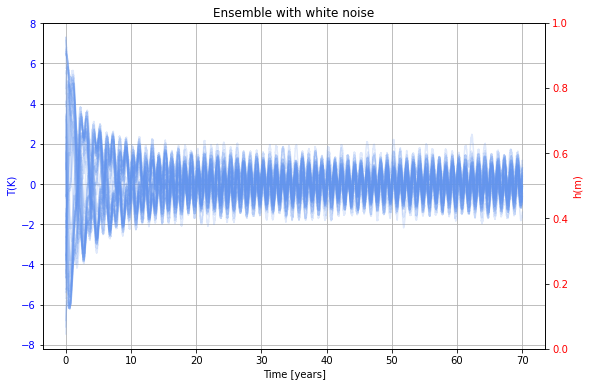

In [14]:
T = T0
h = h0
mu = 0.7
b = b0*mu
R = gama*b - c
epsilon = 0.1
f_ann = 0.1
f_ran = 0.2
tau = 12*30/60 # 12 months.  must divide this by 2 months to non-dimensional

time = 120*7*30/60 # 70 years
dt = 1/60 # time step 1 day and also non-dimensionalise by 2 months(60 days)
T_arr, h_arr =[],[]
n = int(time/dt)# total number of time steps
xlim = np.linspace(0,time,n-1)

r = 0.33#correlation coefficient
s = np.sqrt(1 - r**2)
w = np.zeros(n)
w[0] = 2*random.random()-1

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
color = 'b'
ax.set_xlabel('Time [years]')
ax.set_ylabel("T(K)",color=color)
ax.tick_params(axis='y', labelcolor=color)
ax2 = ax.twinx()
color = 'r'
ax2.set_ylabel("h(m)",color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax.grid()
plt.title("Ensemble with white noise")

for j in range(51):
    T_arr, h_arr = [],[]
    T = (2*random.random()-1)  # range from 0 to 7.5K
    h = (2*random.random()-1)

    for i in range(1, n ):        
        w = (2*random.random() - 1)
        xi = f_ann * np.cos(2*np.pi * (i+1) /60/tao) + f_ran*w  # white noise
        T_arr.append(T)
        h_arr.append(h)
        T,h = rungeKutta(T,h)
    
    ax.plot(xlim*2/12, np.array(T_arr)*7.5,color='cornflowerblue',alpha=0.2,label="T(K)")  


plt.savefig(output+'whiteNoiseEnsembleT')

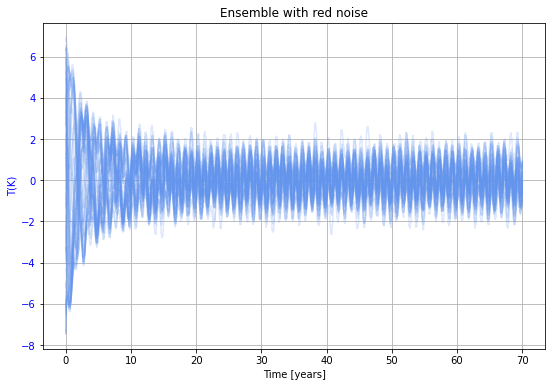

In [15]:
T = T0
h = h0
mu = 0.7
b = b0*mu
R = gama * b - c
epsilon = 0.1
f_ann = 0.1
f_ran = 0.2
tau = 12*30/60 # 12 months.  must divide this by 2 months to non-dimensional

time = 120*7*30/60 # 70 years
dt = 1/60 # time step 1 day and also non-dimensionalise by 2 months(60 days)
T_arr, h_arr = [], []
n = int(time/dt) # total number of time steps
xlim = np.linspace(0,time,n-1)

r = 0.33 #correlation coefficient
s = np.sqrt(1 - r**2)
w = np.zeros(n)
w[0] = 2*random.random()-1

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
color = 'b'
ax.set_xlabel('Time [years]')
ax.set_ylabel("T(K)",color=color)
ax.tick_params(axis='y', labelcolor=color)
ax.grid()
plt.title("Ensemble with red noise")

for j in range(51):
    T_arr, h_arr =[],[]
    T = (2*random.random()-1)  # range from 0 to 7.5K
    h = (2*random.random()-1)

    for i in range(1, n ):        
        w[i] = (r*w[i-1] + s*(2*random.random() - 1))
        xi =  f_ann*np.cos(2*np.pi*(i+1)/tau/60) + f_ran*w[i]  # red noise
        T_arr.append(T)
        h_arr.append(h)
        T, h = rungeKutta(T, h)
        
    ax.plot(xlim*2/12, np.array(T_arr)*7.5,color='cornflowerblue',alpha=0.2,label="T(K)")  


plt.savefig(output+'redNoiseEnsembleT')

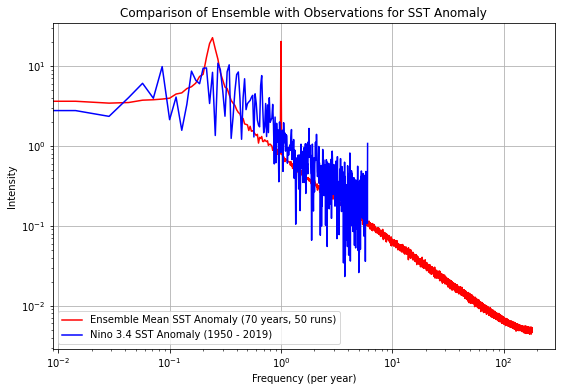

In [16]:
freq_array = np.zeros([51,12600])
mag_array = np.zeros([51,12600])
freq_mean = np.zeros(12600)
mag_mean = np.zeros(12600)

fig = plt.figure(figsize=(9,6))

for j in range(51):
    T_arr, h_arr = [],[]
    T = (2*random.random() - 1)  # range from 0 to 7.5K
    h = (2*random.random() - 1)

    for i in range(1, n):        
        w[i] = (r*w[i-1] + s*(2*random.random() - 1))
        xi = f_ann*np.cos(2*np.pi*(i+1)/tau/60) + f_ran*w[i]   # red noise
        T_arr.append(T)
        h_arr.append(h)
        T, h = rungeKutta(T, h)
        
    data = np.array(T_arr)*7.5
    ft = np.fft.rfft(data)
    freqs = np.fft.rfftfreq(len(data), 1) # Get frequency axis from the time axis
    mags = abs(ft)
    
    freq_array[j,:] = freqs[:]
    mag_array[j,:] = mags[:]
    
    # Uncomment to plot the individual lines in the ensemble
    # plt.grid()
    # plt.loglog(freqs*360, mags/365,alpha=0.4)

    
for i in range(12600):
    freq_mean[i] = np.mean(freq_array[:,i])
    mag_mean[i] = np.mean(mag_array[:,i])
    
plt.loglog(freq_mean*360,mag_mean/365,label=fr'Ensemble Mean SST Anomaly (70 years, 50 runs)',color='r')   


nino3 = pd.read_csv('nino34.csv', sep=',',header=None)
months = np.tile(range(12),len(nino3))
years = np.repeat(nino3.iloc[:, 0].values,12)
data = nino3.iloc[:,1:].values.flatten()
d = {'years':years, 'months':months, 'data':data}
df = pd.DataFrame(data=d)
df_index = pd.date_range(start='1870-01-01', freq='MS', periods=1812)
df.set_index(df_index,inplace=True)
df = df['1950':'2019']
x = df.data.values
ft = np.fft.rfft(x)
freqs = np.fft.rfftfreq(len(x), 1) # Get frequency axis from the time axis
mags = abs(ft) 
plt.loglog(freqs*12, mags/12,color='b',label='Nino 3.4 SST Anomaly (1950 - 2019)')

plt.grid()  
plt.legend()
plt.ylabel('Intensity')
plt.xlabel('Frequency (per year)')
plt.title("Comparison of Ensemble with Observations for SST Anomaly")
plt.savefig(output+'spectra')